#Price Prediction for Appartments

##Objective

The objective is to develop a predictive model that estimates the prices of apartments based on a set of features such as size, location, number of BHK, society, etc.

##Problem Statement

Buying or selling an apartment is a big decision, and knowing the right price can make a huge difference. It's well known that house prices depend on many factors such as location, size, number of rooms, nearby facilities,  etc. Therefore, buyers, sellers, and investors make better choices if house prices are predicted accurately.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Datasets/original_dataset.csv")

In [3]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

There are total of 21 features and 187531 rows in the dataset before cleaning.

####Dropping Insignificant Features

In [ ]:

#Removing "Dimensions and Plot Area", since they do not have a single non-null value
#Removing "Index", since it is unnecessary
df.drop(["Index","Dimensions","Plot Area"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Title              187531 non-null  object 
 1   Description        184508 non-null  object 
 2   Amount(in rupees)  187531 non-null  object 
 3   Price (in rupees)  169866 non-null  float64
 4   location           187531 non-null  object 
 5   Carpet Area        106858 non-null  object 
 6   Status             186916 non-null  object 
 7   Floor              180454 non-null  object 
 8   Transaction        187448 non-null  object 
 9   Furnishing         184634 non-null  object 
 10  facing             117298 non-null  object 
 11  overlooking        106095 non-null  object 
 12  Society            77853 non-null   object 
 13  Bathroom           186703 non-null  object 
 14  Balcony            138596 non-null  object 
 15  Car Parking        84174 non-null   object 
 16  Ow

There are 18 features after dropping insignificant features.

####Removing Duplicates

In [ ]:
df.duplicated().sum()/df.shape[0]*100

63.63694535836741

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68192 entries, 0 to 68191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68192 non-null  object 
 1   Description        65974 non-null  object 
 2   Amount(in rupees)  68192 non-null  object 
 3   Price (in rupees)  62298 non-null  float64
 4   location           68192 non-null  object 
 5   Carpet Area        38075 non-null  object 
 6   Status             67893 non-null  object 
 7   Floor              65577 non-null  object 
 8   Transaction        68114 non-null  object 
 9   Furnishing         66902 non-null  object 
 10  facing             41392 non-null  object 
 11  overlooking        38657 non-null  object 
 12  Society            29372 non-null  object 
 13  Bathroom           67721 non-null  object 
 14  Balcony            49133 non-null  object 
 15  Car Parking        28863 non-null  object 
 16  Ownership          432

There are 68192 rows in the dataset after removing duplicates.

###"Title" column

In [ ]:
"""from the "Title" column we can extract the number of BHK, location, society, or somtimes price.
But apart from number of BHK all the other features are already in the dataset.
Therefore, we extract only the number of BHK from the "Title" column. """

import re

bhk=[]
for i in df["Title"]:
  a= re.findall("(\d+)\sBHK",i)
  if a:
     bhk.append(a[0])
  else: bhk.append(np.nan)
df["BHK"]=bhk


In [ ]:
df["BHK"]

0        1
1        2
2        2
3        1
4        2
        ..
68187    3
68188    3
68189    3
68190    2
68191    3
Name: BHK, Length: 68192, dtype: object

In [ ]:
"""Here we are trying to check the description of the properties when both the " BHK" and "Floor" is missing.
So, in the description "BHK" is not mentioned."""

df[df["BHK"].isna() & df["Floor"].isna()][["Description","Floor"]]

,Description,Floor
293,This flat for resale has a desirable location....,NaN
1236,"Well-tucked in the Prakriti Sparsh township, t...",NaN
5271,This flat for resale is the perfect property f...,NaN
6668,This flat for resale has a desirable location....,NaN
6845,This premium flat is available for resale at a...,NaN
6881,This flat is available as a resale property. T...,NaN
7352,This is one of the best properties available f...,NaN
8692,It is housed in the well-planned Golden Fortun...,NaN
9788,This flat is situated within the renown townsh...,NaN
17743,This flat is available as a resale property. T...,NaN


In [ ]:
#Title is no more necessary
df.drop("Title",axis=1,inplace=True)

### "Amount(in rupees)" column

In [ ]:
df["Amount(in rupees)"]

0         42 Lac 
1         98 Lac 
2        1.40 Cr 
3         25 Lac 
4        1.60 Cr 
           ...   
68187     63 Lac 
68188     55 Lac 
68189     76 Lac 
68190     30 Lac 
68191    1.18 Cr 
Name: Amount(in rupees), Length: 68192, dtype: object

In [ ]:
""" "Amount(in rupees)" column has price of the house to buy in terms of Lakh or Crore.
 So we try to get only the amount(in Lakhs) and remove "Lac" and "Cr" terms,
 so we will be able to treat it as numerical column."""

amt=[]
for i in df["Amount(in rupees)"]:
  if "Lac" in i:
    amt.append(re.findall("(.*)\sLac",i)[0])
  elif "Cr" in i:
    amt.append(float(re.findall("(.*)\sCr",i)[0])*100)
  else: amt.append(i)


In [ ]:
df["Amount"]=amt

In [ ]:
df["Amount"].count()

68192

In [ ]:
df.drop("Amount(in rupees)",axis=1,inplace=True)

### "Super Area" and "Carpet Area"

In [ ]:
df[(df["Super Area"].isna()&df["Carpet Area"].isna())]

,Description,Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Amount
71,This ready to move-in 1 BHK flat is available ...,NaN,thane,NaN,Ready to Move,5 out of 7,Resale,Furnished,East,Garden/Park,Sagar Residency,2,NaN,NaN,Co-operative Society,NaN,1,53
1576,"Somalwada, Nagpur has an appealing 3 BHK flat ...",NaN,nagpur,NaN,Ready to Move,1 out of 4,Resale,Semi-Furnished,NaN,Garden/Park,NaN,2,2,6 Covered,Freehold,NaN,3,70
3924,Discover this immaculate 2 BHK flat for sale a...,NaN,ahmedabad,NaN,Ready to Move,4 out of 5,Resale,Furnished,NaN,NaN,Shukan Platinum,2,2,NaN,NaN,NaN,2,53
5228,Up for immediate sale is a 2 BHK apartment in ...,NaN,ahmedabad,NaN,Ready to Move,2 out of 13,Resale,Semi-Furnished,NaN,NaN,Ratnaakar Verte,2,1,NaN,NaN,NaN,2,Call for Price
5572,Up for immediate sale is a 1 BHK apartment in ...,NaN,ahmedabad,NaN,Ready to Move,Ground out of 3,Resale,Furnished,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65441,Discover this immaculate 3 BHK flat for sale a...,NaN,visakhapatnam,NaN,Ready to Move,3 out of 5,Resale,Furnished,East,"Pool, Garden/Park",MK Senate,3,1,1 Covered,Freehold,NaN,3,Call for Price
66217,Carefully laid out in the prime location of Si...,NaN,visakhapatnam,NaN,Ready to Move,4 out of 5,Resale,Unfurnished,NaN,NaN,Sai Teja Lakshmi Narasimha Residency,2,2,NaN,NaN,NaN,3,35
66479,It enjoys an excellent location within the Cha...,NaN,visakhapatnam,NaN,Ready to Move,NaN,Resale,NaN,NaN,NaN,Chalamajis Landmark,NaN,NaN,NaN,NaN,NaN,NaN,Call for Price
66920,"VIP Road, Zirakpur has an appealing 2 BHK flat...",NaN,zirakpur,NaN,Ready to Move,2 out of 10,Resale,Semi-Furnished,South - East,Garden/Park,NaN,2,3,1 Covered,Freehold,NaN,2,33


In [ ]:
df[(df["Super Area"].notna()&df["Carpet Area"].notna())]

,Description,Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Amount


We can observe from the above two tables that there is not a single row where both the columns "Super Area" and "Carpet Area" have values, i.e. if one column has value, the other one doesn't have value and vice versa. Therefore we can say that the "Carpet Area" and "Surface Area" are the same. So we try to form a single column "Area" out of the two column.

In [ ]:
#Filling the null values with 0, so that we can add both the columns
df["Super Area"].fillna(0,inplace=True)
df["Carpet Area"].fillna(0,inplace=True)

In [ ]:
# These are the different units for "Super Area" column
a=[]
for i in df["Super Area"]:
  if i!=0:
    a.append(i.split()[1])
set(a)

{'aankadam',
 'acre',
 'biswa2',
 'cent',
 'ground',
 'hectare',
 'kanal',
 'marla',
 'sqft',
 'sqm',
 'sqyrd'}

In [ ]:
#These are the units for Carpet Area
a=[]
for i in df["Carpet Area"]:
  if i!=0:
    a.append(i.split()[1])
set(a)

{'acre', 'bigha', 'cent', 'ground', 'kanal', 'marla', 'sqft', 'sqm', 'sqyrd'}

In [ ]:
#Creating a function to convert all different units to sqft

def unit_change(column):
  sa=[]
  for i in column:
    if i==0:
      sa.append(0)
    else:
      unit  = i.split()[1]
      value = float(i.split()[0].replace(",",""))

      match unit:
        case "sqft":
          sa.append(value)
        case "cent":
          sa.append(value*435.6)
        case "ground":
          sa.append(value*2400)
        case "sqyrd":
          sa.append(value*9)
        case "sqm":
          sa.append(value*10.7639)
        case "hectare":
          sa.append(value*107639.104)
        case "acre":
          sa.append(value*43560)
        case "kanal":
          sa.append(value*5445)
        case "marla":
          sa.append(value*272.25)
        case "aankadam":
          sa.append(value*72)
        case "bigha":
          sa.append(value*14400)
        case "biswa2":
          sa.append(value*720)
  return sa

In [ ]:
#Using the function unit_change to tranform two column values
df["Super Area"]=unit_change(df["Super Area"])
df["Carpet Area"]=unit_change(df["Carpet Area"])

In [ ]:
print(len(df["Carpet Area"]),len(df["Carpet Area"]))

68192 68192


In [ ]:
#Creating a new column "Area" by combining both "Carpet Area" and "Super Area"
df["Area"]=df["Super Area"]+df["Carpet Area"]

In [ ]:
df.drop(["Super Area","Carpet Area"],axis=1,inplace=True)

In [ ]:
df.loc[df["Area"]==0,"Area"]=np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68192 entries, 0 to 68191
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        65974 non-null  object 
 1   Price (in rupees)  62298 non-null  float64
 2   location           68192 non-null  object 
 3   Status             67893 non-null  object 
 4   Floor              65577 non-null  object 
 5   Transaction        68114 non-null  object 
 6   Furnishing         66902 non-null  object 
 7   facing             41392 non-null  object 
 8   overlooking        38657 non-null  object 
 9   Society            29372 non-null  object 
 10  Bathroom           67721 non-null  object 
 11  Balcony            49133 non-null  object 
 12  Car Parking        28863 non-null  object 
 13  Ownership          43264 non-null  object 
 14  BHK                67867 non-null  object 
 15  Amount             68192 non-null  object 
 16  Area               680

###"Price( in rupees)" column and "Amount" column

In [ ]:
df["Price (in rupees)"]*df["Area"] #Price (in rupees) is the price per sqft

0         3000000.0
1         6526927.0
2        13632500.0
3               NaN
4        11953240.0
            ...    
68187     6298425.0
68188     5500320.0
68189     5428750.0
68190     2999779.0
68191    11800230.0
Length: 68192, dtype: float64

In [ ]:
df["Amount"]

0           42
1           98
2        140.0
3           25
4        160.0
         ...  
68187       63
68188       55
68189       76
68190       30
68191    118.0
Name: Amount, Length: 68192, dtype: object

From the above two code block we can observe that we can calculate "Amount" by multiplying "Price (in rupees) with "Area". So we try to see if we can impute the "Call for Price" value by multiplting the "Area" and "Price (in rupees)" column. But the "Price (in rupees)" column has null value when "Amount"="Call for Price", so we fail to do it.

In [ ]:
df[((df["Amount"]=="Call for Price") & (df["Price (in rupees)"].notna()))]

,Description,Price (in rupees),location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,BHK,Amount,Area


In [ ]:
df.loc[df["Amount"]=="Call for Price","Amount"]=np.nan

In [ ]:
#Dropping the "Price (in rupees)" since it gives the values of target column if multiplied with "Area".

df.drop("Price (in rupees)",axis=1,inplace=True)

### "Location" column

In [ ]:
df["location"].value_counts() # It doesn't have any null values and the datas are clean

location
faridabad        3000
greater-noida    3000
chennai          2999
gurgaon          2998
jaipur           2998
                 ... 
nellore            30
palakkad           30
solapur            30
pondicherry        30
navsari            30
Name: count, Length: 81, dtype: int64

###"Status" column

In [ ]:
print(df["Status"].value_counts())
df.drop("Status",axis=1,inplace=True) # Dropping "Status" column because all the values are same.

Status
Ready to Move    67893
Name: count, dtype: int64


### "Transaction" column

In [ ]:
df["Transaction"].value_counts()

Transaction
Resale          50614
New Property    17438
Other              60
Rent/Lease          2
Name: count, dtype: int64

In [ ]:
df[df["Transaction"]=="Rent/Lease"]

,Description,location,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,BHK,Amount,Area
3441,Discover this immaculate 3 BHK flat for sale a...,ahmedabad,3 out of 10,Rent/Lease,Semi-Furnished,South,Garden/Park,NaN,3,NaN,NaN,Freehold,3,80,1840.0
18896,Up for immediate sale is a 3 BHK apartment in ...,jaipur,2 out of 3,Rent/Lease,Semi-Furnished,North - East,Main Road,NaN,2,1,NaN,Freehold,3,25,1000.0


In [ ]:
#Since Rent/Lease has only two values we put it in the "Other" category.
df.loc[df["Transaction"]=="Rent/Lease","Transaction"]="Other"

###"Facing" column

In [ ]:
df["facing"].value_counts()

facing
East            19000
North - East     8644
North            5642
West             3301
South            1689
South - East     1256
North - West     1189
South -West       671
Name: count, dtype: int64

In [ ]:
df["facing"].isna().sum()/df.shape[0]*100

39.30079774753637

In [ ]:
#40% of the data in this column is missing so we replace the null values with "Not Mentioned"
df["facing"].fillna("Not Mentioned",inplace=True)

In [ ]:
df[df["facing"]=="Not Mentioned"]

,Description,location,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,BHK,Amount,Area
0,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",thane,10 out of 11,Resale,Unfurnished,Not Mentioned,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,1,42,500.0
3,This beautiful 1 BHK Flat is available for sal...,thane,1 out of 3,Resale,Unfurnished,Not Mentioned,NaN,NaN,1,1,NaN,NaN,1,25,530.0
6,This magnificent 1 BHK Flat is available for s...,thane,4 out of 5,Resale,Unfurnished,Not Mentioned,NaN,NaN,1,NaN,NaN,NaN,1,16.5,550.0
7,Creatively planned and constructed is a 1 BHK ...,thane,Ground out of 7,Resale,Furnished,Not Mentioned,NaN,NaN,1,NaN,NaN,NaN,1,60,575.0
8,Discover this immaculate 1 BHK flat for sale a...,thane,Ground out of 2,Resale,Furnished,Not Mentioned,NaN,NaN,1,NaN,NaN,Co-operative Society,1,60,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68176,This exquisite 3 BHK Flat is offered for sale ...,zirakpur,2 out of 3,Resale,Semi-Furnished,Not Mentioned,NaN,Savitry Enclave,3,2,NaN,Freehold,3,55,1200.0
68179,This ready to move-in 3 BHK flat is available ...,zirakpur,7 out of 8,Resale,Unfurnished,Not Mentioned,"Garden/Park, Pool",Sushma Urban Views,2,5,NaN,Freehold,3,54.9,1680.0
68180,This magnificent 3 BHK Flat is available for s...,zirakpur,3 out of 4,Resale,Furnished,Not Mentioned,NaN,NaN,3,NaN,NaN,NaN,3,37,840.0
68182,"Nagla Road, Zirakpur has an appealing 4 BHK fl...",zirakpur,2 out of 11,Resale,Unfurnished,Not Mentioned,"Garden/Park, Main Road",NaN,4,4,NaN,Freehold,4,118.0,2029.0


### "overlooking" column

In [ ]:
df["overlooking"].value_counts()

overlooking
Main Road                                      12245
Garden/Park, Main Road                          8875
Garden/Park                                     8269
Garden/Park, Pool, Main Road                    4735
Pool, Garden/Park, Main Road                    1593
Garden/Park, Pool                               1383
Pool, Garden/Park                                367
Pool                                             355
Main Road, Garden/Park                           351
Main Road, Garden/Park, Pool                     213
Pool, Main Road                                  202
Garden/Park, Main Road, Pool                      37
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        1
Garden/Park, Not Available                         1
Pool, Main Road, Not Available    

In [ ]:
df["overlooking"].isna().sum()/df.shape[0]*100

43.31153214453308

In [ ]:
"""43% of the data in this column is missing. And if the value in overlooking is missing,
 it means that it doesn't have any overlook/view. So, we replace the null values with Not Available."""

df["overlooking"].fillna("Not Available",inplace=True)

In [ ]:
#Since there are values which are just the same but the placement is different, we try to replace all the other with one value.

df["overlooking"]=df["overlooking"].str.replace(", Not Available","")

values= [
    "Pool, Garden/Park, Main Road",
    "Main Road, Garden/Park, Pool",
    "Garden/Park, Main Road, Pool",
    "Main Road, Pool, Garden/Park",
    "Pool, Main Road, Garden/Park"
]

df.loc[df['overlooking'].isin(values), 'overlooking'] = "Garden/Park, Pool, Main Road"

df.loc[df['overlooking'].isin(["Pool, Garden/Park"]), 'overlooking'] = "Garden/Park, Pool"

df.loc[df['overlooking'].isin(["Main Road, Garden/Park"]), 'overlooking'] = "Garden/Park, Main Road"

df.loc[df['overlooking'].isin(["Pool, Main Road"]), 'overlooking'] = "Main Road, Pool"


In [ ]:
df["overlooking"].value_counts()

overlooking
Not Available                   29535
Main Road                       12249
Garden/Park, Main Road           9226
Garden/Park                      8270
Garden/Park, Pool, Main Road     6593
Garden/Park, Pool                1750
Pool                              355
Main Road, Pool                   214
Name: count, dtype: int64

###"Society" column

In [ ]:
# Replace the null values of "Society" with "Standlone Building" because those properties are not a part of any Society
df["Society"].fillna("Standlone Building",inplace=True)

###"Balcony" column

In [ ]:
df["Balcony"].value_counts()

Balcony
2       18755
1       15866
3       10169
4        3422
5         737
6         126
> 10       18
7          13
8          13
10         12
9           2
Name: count, dtype: int64

In [ ]:
df["Balcony"].isna().sum()

19059

In [ ]:
#Null values for "Balcony" means that the house doesn't have any Balcony. So replace the null values with 0.
df["Balcony"].fillna(0,inplace=True)

### "Bathroom" column

In [ ]:
df["Bathroom"].value_counts()

Bathroom
2       34697
3       19528
1        6959
4        4924
5        1318
6         198
> 10       33
7          31
10         12
8          12
9           9
Name: count, dtype: int64

In [ ]:
df["Bathroom"].isna().sum()

471

In [ ]:
#Null values for "Bathroom" means that the house doesn't have any Bathroom. So replace the null values with 0.
df["Bathroom"].fillna(0,inplace=True)

###"Car Parking" column

In [ ]:
df["Car Parking"].value_counts()

Car Parking
1 Covered      15781
1 Covered,      4103
1 Open          3441
2 Covered       2981
2 Covered,       875
               ...  
701 Open           1
40 Covered         1
205 Open           1
309 Covered        1
702 Open           1
Name: count, Length: 229, dtype: int64

In [ ]:
df["Car Parking"]=df["Car Parking"].str.replace(",","") #Removing the "," from the data

In [ ]:
"""Null values in "Car Parking" means that ther are no car parking area provided.
So we Replace the null values with "0 Not_Available". """
df["Car Parking"].fillna("0 Not_Available",inplace=True)

In [ ]:
df["Car Parking"].value_counts()

Car Parking
0 Not_Available    39329
1 Covered          19884
2 Covered           3856
1 Open              3441
3 Covered            491
                   ...  
113 Open               1
818 Open               1
118 Open               1
300 Covered            1
702 Open               1
Name: count, Length: 208, dtype: int64

In [ ]:
#Spliting the "Car Parking" column into two columns, one to store the number of car parrking area and the other to store if the car parking is covered or uncovered.
df["Type of Car Parking"] = df["Car Parking"].apply(lambda x: x.split()[1])
df["No of Car Parking"] = df["Car Parking"].apply(lambda x: x.split()[0])

In [ ]:
df["Type of Car Parking"].value_counts()

Type of Car Parking
Not_Available    39329
Covered          24814
Open              4049
Name: count, dtype: int64

In [ ]:
df["No of Car Parking"].value_counts()

No of Car Parking
0      39329
1      23325
2       4228
3        528
4        152
       ...  
804        1
151        1
309        1
536        1
109        1
Name: count, Length: 157, dtype: int64

In [ ]:
df.drop("Car Parking",axis=1,inplace=True)

###"Ownership" column

In [ ]:
df["Ownership"].value_counts()

Ownership
Freehold                37341
Leasehold                3070
Co-operative Society     2370
Power Of Attorney         483
Name: count, dtype: int64

In [ ]:
df["Ownership"].isna().sum()/df.shape[0]*100

36.55560769591741

In [ ]:
#36% of the data in this column is missing so we replace it with "Not mentioned"
df["Ownership"].fillna("Not Mentioned",inplace=True)

###"Floor" column

In [ ]:
df["Floor"]

0        10 out of 11
1         3 out of 22
2        10 out of 29
3          1 out of 3
4        20 out of 42
             ...     
68187      2 out of 4
68188      4 out of 6
68189      1 out of 3
68190      2 out of 2
68191     5 out of 13
Name: Floor, Length: 68192, dtype: object

In [ ]:
# We are replace the null value temporarily with "-5 out of -5" to perform other operations.
df["Floor"].fillna("-5 out of -5",inplace=True)

In [ ]:
#Replacing "Upper Basement" with -1, "Lower Basement" with -2 and "Ground" with 0.
df["Floor"]=df["Floor"].str.replace("Upper Basement","-1").str.replace("Lower Basement","-2").str.replace("Ground","0")

In [ ]:
# Splitting the "Floor" column and storing the values which represents the floor number which is being sold in a new column.
df["Sale Floor"] = df["Floor"].apply(lambda x: x.split()[0])

In [ ]:
df["Sale Floor"].value_counts()

Sale Floor
2      12121
1      11463
3       9900
4       7051
5       5040
0       3840
6       2664
-5      2615
7       2505
8       1921
9       1636
10      1593
12      1093
11      1012
14       560
15       448
13       441
16       325
18       276
17       275
-1       215
20       196
19       165
-2       133
21       122
22        93
23        75
25        74
24        73
26        57
28        38
30        36
27        31
29        20
32        16
33        10
31         9
35         8
40         7
34         7
38         5
42         3
50         3
60         2
37         2
39         2
45         2
63         1
75         1
70         1
44         1
46         1
36         1
59         1
51         1
200        1
Name: count, dtype: int64

In [ ]:
#Slitting the "Floor" column and storing the total number floors in the building in a new column "Total Floors"
df["Total Floors"] = df["Floor"].apply(lambda x: x.split()[3] if len(x.split()) > 1 else "-1")

In [ ]:
df["Total Floors"].value_counts()

Total Floors
4     14243
5      8376
3      7731
6      3271
7      3149
      ...  
58        1
85        1
48        1
47        1
70        1
Name: count, Length: 75, dtype: int64

In [ ]:
#Replcaing the temporarily replaced null values back to null
df.loc[df["Sale Floor"]=="-5","Sale Floor"]=np.nan
df.loc[df["Total Floors"]=="-5","Total Floors"]=np.nan

In [ ]:
df.drop("Floor",axis=1,inplace=True)

###"Furnishing" column

In [ ]:
df["Furnishing"].value_counts()

Furnishing
Semi-Furnished    29248
Unfurnished       28537
Furnished          9117
Name: count, dtype: int64

In [ ]:
df["Furnishing"].isna().sum()/df.shape[0]*100

1.8917175035194744

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68192 entries, 0 to 68191
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          65974 non-null  object 
 1   location             68192 non-null  object 
 2   Transaction          68114 non-null  object 
 3   Furnishing           66902 non-null  object 
 4   facing               68192 non-null  object 
 5   overlooking          68192 non-null  object 
 6   Society              68192 non-null  object 
 7   Bathroom             68192 non-null  object 
 8   Balcony              68192 non-null  object 
 9   Ownership            68192 non-null  object 
 10  BHK                  67867 non-null  object 
 11  Amount               65255 non-null  object 
 12  Area                 68068 non-null  float64
 13  Type of Car Parking  68192 non-null  object 
 14  No of Car Parking    68192 non-null  object 
 15  Sale Floor           65577 non-null 

In [ ]:
#Renaming some of the column name
df=df.rename(columns={"location":"Location","facing":"Facing","overlooking":"Overlooking"})

## Null Values Treatment

In [ ]:
df.isna().sum()/df.shape[0]*100

Description            3.252581
Location               0.000000
Transaction            0.114383
Furnishing             1.891718
Facing                 0.000000
Overlooking            0.000000
Society                0.000000
Bathroom               0.000000
Balcony                0.000000
Ownership              0.000000
BHK                    0.476595
Amount                 4.306957
Area                   0.181840
Type of Car Parking    0.000000
No of Car Parking      0.000000
Sale Floor             3.834761
Total Floors           3.834761
dtype: float64

Every column has less than 5% null values in the dataset.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Society,Bathroom,Balcony,Ownership,BHK,Amount,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
0,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",thane,Resale,Unfurnished,Not Mentioned,Not Available,Srushti Siddhi Mangal Murti Complex,1,2,Not Mentioned,1,42,500.0,Not_Available,0,10,11
1,One can find this stunning 2 BHK flat for sale...,thane,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,0,Freehold,2,98,473.0,Open,1,3,22
2,Up for immediate sale is a 2 BHK apartment in ...,thane,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,0,Freehold,2,140.0,779.0,Covered,1,10,29
3,This beautiful 1 BHK Flat is available for sal...,thane,Resale,Unfurnished,Not Mentioned,Not Available,Standlone Building,1,1,Not Mentioned,1,25,530.0,Not_Available,0,1,3
4,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",thane,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,0,Co-operative Society,2,160.0,635.0,Covered,1,20,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68187,This magnificent 3 BHK Flat is available for s...,zirakpur,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,Freehold,3,63,1953.0,Covered,1,2,4
68188,Have a look at this immaculate 3 BHK flat for ...,zirakpur,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,0,Not Mentioned,3,55,1680.0,Covered,1,4,6
68189,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",zirakpur,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,Freehold,3,76,1250.0,Covered,1,1,3
68190,Up for immediate sale is a 2 BHK apartment in ...,zirakpur,Resale,Semi-Furnished,Not Mentioned,Main Road,Friends Enclave,2,0,Not Mentioned,2,30,709.0,Not_Available,0,2,2


## Data Type Conversion

In [ ]:
df["BHK"]=df["BHK"].astype("int8")
df["Amount"]=df["Amount"].astype("float32")
df["Area"]=df["Area"].astype("float32")
df["No of Car Parking"]=df["No of Car Parking"].astype("int16")
df["Sale Floor"]=df["Sale Floor"].astype("int16")
df["Total Floors"]=df["Total Floors"].astype("int16")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59864 entries, 0 to 68191
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          59864 non-null  object 
 1   Location             59864 non-null  object 
 2   Transaction          59864 non-null  object 
 3   Furnishing           59864 non-null  object 
 4   Facing               59864 non-null  object 
 5   Overlooking          59864 non-null  object 
 6   Society              59864 non-null  object 
 7   Bathroom             59864 non-null  object 
 8   Balcony              59864 non-null  object 
 9   Ownership            59864 non-null  object 
 10  BHK                  59864 non-null  int8   
 11  Amount               59864 non-null  float32
 12  Area                 59864 non-null  float32
 13  Type of Car Parking  59864 non-null  object 
 14  No of Car Parking    59864 non-null  int16  
 15  Sale Floor           59864 non-null  int1

In [ ]:
df["Balcony"].value_counts()

Balcony
2       17823
1       14551
0       13614
3        9717
4        3289
5         700
6         120
7          13
8          13
10         12
> 10       11
9           1
Name: count, dtype: int64

In [ ]:
#Since "Balcony" has a value >10 and it is only 13 in number, we cand drop it
df.drop(df[df["Balcony"]=="> 10"].index,inplace=True)

In [ ]:
df["Balcony"]=df["Balcony"].astype("int8")

In [ ]:
df["Bathroom"].value_counts()

Bathroom
2       30575
3       17630
1        5714
4        4513
5        1182
6         165
7          25
> 10       17
0          13
8           9
10          6
9           4
Name: count, dtype: int64

In [ ]:
#Since "Bathroom" has a value >10 and it is only 18 in number, we cand drop it
df.drop(df[df["Bathroom"]=="> 10"].index,inplace=True)

In [ ]:
df["Bathroom"]=df["Bathroom"].astype("int8")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59836 entries, 0 to 68191
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          59836 non-null  object 
 1   Location             59836 non-null  object 
 2   Transaction          59836 non-null  object 
 3   Furnishing           59836 non-null  object 
 4   Facing               59836 non-null  object 
 5   Overlooking          59836 non-null  object 
 6   Society              59836 non-null  object 
 7   Bathroom             59836 non-null  int8   
 8   Balcony              59836 non-null  int8   
 9   Ownership            59836 non-null  object 
 10  BHK                  59836 non-null  int8   
 11  Amount               59836 non-null  float32
 12  Area                 59836 non-null  float32
 13  Type of Car Parking  59836 non-null  object 
 14  No of Car Parking    59836 non-null  int16  
 15  Sale Floor           59836 non-null  int1

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Society,Bathroom,Balcony,Ownership,BHK,Amount,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
0,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",thane,Resale,Unfurnished,Not Mentioned,Not Available,Srushti Siddhi Mangal Murti Complex,1,2,Not Mentioned,1,42.0,500.0,Not_Available,0,10,11
1,One can find this stunning 2 BHK flat for sale...,thane,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,0,Freehold,2,98.0,473.0,Open,1,3,22
2,Up for immediate sale is a 2 BHK apartment in ...,thane,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,0,Freehold,2,140.0,779.0,Covered,1,10,29
3,This beautiful 1 BHK Flat is available for sal...,thane,Resale,Unfurnished,Not Mentioned,Not Available,Standlone Building,1,1,Not Mentioned,1,25.0,530.0,Not_Available,0,1,3
4,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",thane,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,0,Co-operative Society,2,160.0,635.0,Covered,1,20,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59831,This magnificent 3 BHK Flat is available for s...,zirakpur,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,Freehold,3,63.0,1953.0,Covered,1,2,4
59832,Have a look at this immaculate 3 BHK flat for ...,zirakpur,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,0,Not Mentioned,3,55.0,1680.0,Covered,1,4,6
59833,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",zirakpur,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,Freehold,3,76.0,1250.0,Covered,1,1,3
59834,Up for immediate sale is a 2 BHK apartment in ...,zirakpur,Resale,Semi-Furnished,Not Mentioned,Main Road,Friends Enclave,2,0,Not Mentioned,2,30.0,709.0,Not_Available,0,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59836 entries, 0 to 59835
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          59836 non-null  object 
 1   Location             59836 non-null  object 
 2   Transaction          59836 non-null  object 
 3   Furnishing           59836 non-null  object 
 4   Facing               59836 non-null  object 
 5   Overlooking          59836 non-null  object 
 6   Society              59836 non-null  object 
 7   Bathroom             59836 non-null  int64  
 8   Balcony              59836 non-null  int64  
 9   Ownership            59836 non-null  object 
 10  BHK                  59836 non-null  int64  
 11  Amount               59836 non-null  float64
 12  Area                 59836 non-null  float64
 13  Type of Car Parking  59836 non-null  object 
 14  No of Car Parking    59836 non-null  int64  
 15  Sale Floor           59836 non-null 

##About DataSet

1. **Description**: It is a test-based column, it gives the description of the flat in a paragraph.
2. **Location**: It gives the location of the flat.
3. **Transaction**: It is a categorical feature that gives the different transaction type. It has three categories in the dataset: Resale, New Property and Other, where Other consists of all the other Transaction types, since they are in minority.
4. **Furnishing**: It gives the type of furnishing of the flat. Unfurnished, Furnished or Semi-Furnished.
5. **Facing**: It gives the direction where the flat is facing. It is also a categorical column.
6. **Overlooking**: It gives the overlook that the flat provides. It is also a categorical column.
7. **Society**: Every flats is either a part of society/community or is not a part of Society. This feature provides with the name of the Society the flat belongs to. If the flat is not a part of a society then it is Standalone Building
8. **Bathroom**: It gives the count of Bathroom in the flat up to 10.
9. **Balcony**: It gives the count of Balcony in the flat up to 10.
10. **Ownership**: It gives the ownership types for the flats. They are Freehold, Leasehold, Co-operative Society, Power of Attorney.
11. **BHK**: It gives the count of BHK in the flat up to 10.
12. **Amount**: It gives the price of the flat to buy, it is in lakhs.
13. **Area**:It gives the area that the flat covers.
14. **Type of Car Parking**: It gives the type of Car Parking spot provided by the flat. Either Open or Covered. If not provided, then it is represented by Not_Available.
15. **No of Car Parking**: It gives the count of Car Parking spot provided by the flat.
16. **Sale Floor**: It gives the floor number that is being sold.Here, -2 means lower basement, -1 means upper basement, 0 means Ground floor, others values starts from 1 up to 200.
17. **Total Floors**: It gives the total number of floors in the building of which a flat is being bought.

##Exploratory Data Analysis and Cleaning

In [ ]:
df.describe()

,Bathroom,Balcony,BHK,Amount,Area,No of Car Parking,Sale Floor,Total Floors
count,59836.000000,59836.000000,59836.000000,59836.000000,5.983600e+04,59836.000000,59836.000000,59836.000000
mean,2.424109,1.621398,2.555552,107.015807,3.958026e+03,1.748964,4.364998,8.635520
std,0.871950,1.247021,0.828307,653.791820,3.412146e+05,22.513442,4.463267,7.006509
min,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,-2.000000,-1.000000
25%,2.000000,1.000000,2.000000,41.500000,8.600000e+02,0.000000,2.000000,4.000000
50%,2.000000,2.000000,3.000000,65.000000,1.150000e+03,0.000000,3.000000,5.000000
75%,3.000000,2.000000,3.000000,110.000000,1.550000e+03,1.000000,5.000000,12.000000
max,10.000000,10.000000,10.000000,140030.000000,6.534000e+07,999.000000,200.000000,200.000000


We can observe that:
1. All the numerical comlumn is right skewed and has outliers. The difference between the 75% and max is huge, and max and mean has more difference compared to min amd mean, mostly for "Amount", "Area", "No of Car Parking", "Sale Floor", "Total Floors".

2. In case of "Bathroom", "Balcony", "BHK", "Sale Floor", "Total Floors", "No of Car Parking", it is possible to have the all the possible values from min to max given above.

3. But in case of "Amount" and "Area", it is not possible to have the range of values from min to max given above.

In [ ]:
df[df["Amount"]==140030]

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Society,Bathroom,Balcony,Ownership,BHK,Amount,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
53946,Have a look at this immaculate 3 BHK flat for ...,vadodara,New Property,Unfurnished,Not Mentioned,Not Available,Nest Harmony,3,5,Not Mentioned,3,140030.0,1252.0,Covered,1,5,9


We can observe from the above table that the data point is a 3 BHK flat, area is 1252 sqft, unfurnished, which makes it impossible for the Amount to be 140030 Lakh, and it implies that this amount is faulty. So we might have to drop outliers.

In [ ]:
df[df["Area"]==1]

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Society,Bathroom,Balcony,Ownership,BHK,Amount,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
46118,One can find this stunning 2 BHK flat for sale...,mysore,Resale,Unfurnished,Not Mentioned,Not Available,Yesh Farms,1,0,Not Mentioned,2,35.0,1.0,Not_Available,0,-2,1
50145,"Kundli, Sonipat has an appealing 2 BHK flat fo...",sonipat,New Property,Unfurnished,North,"Garden/Park, Main Road",The New Town,2,2,Freehold,2,25.0,1.0,Open,1,5,12
53446,This attractive 2 BHK apartment can be found f...,udaipur,Resale,Semi-Furnished,Not Mentioned,Not Available,Standlone Building,2,0,Not Mentioned,2,45.0,1.0,Not_Available,0,4,4
58239,This attractive 3 BHK apartment can be found f...,visakhapatnam,Resale,Unfurnished,Not Mentioned,Not Available,Standlone Building,2,1,Not Mentioned,3,70.0,1.0,Covered,1,1,4


We can observe from the above table that there are datapoints with area =1 sqft which is impossible. So we will need to impute these kind of values of "Area" column.

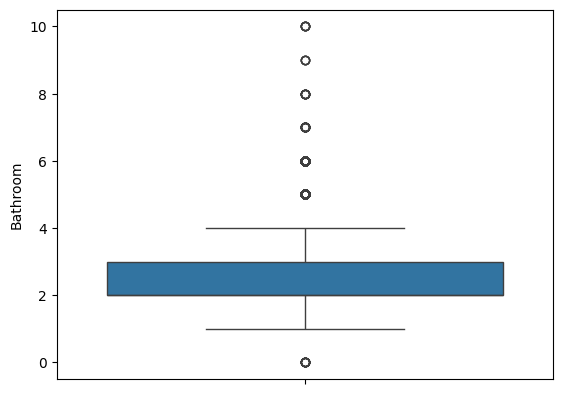

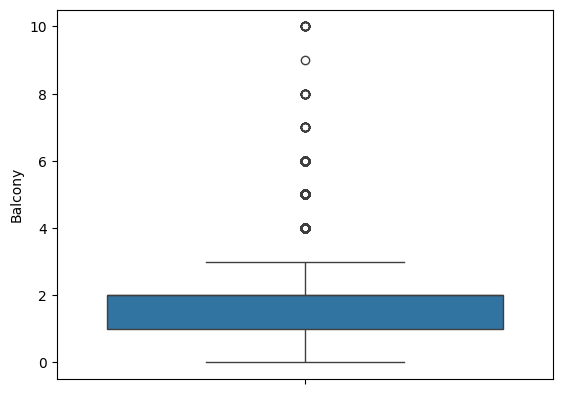

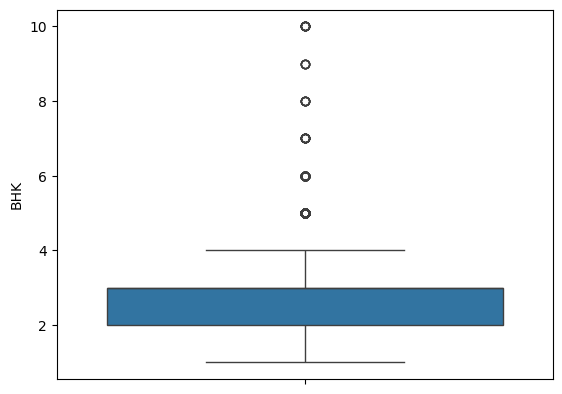

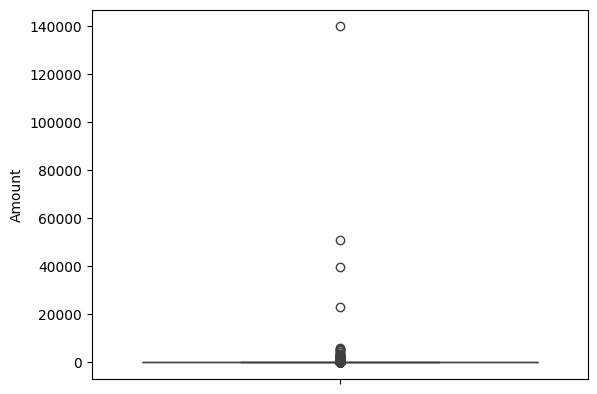

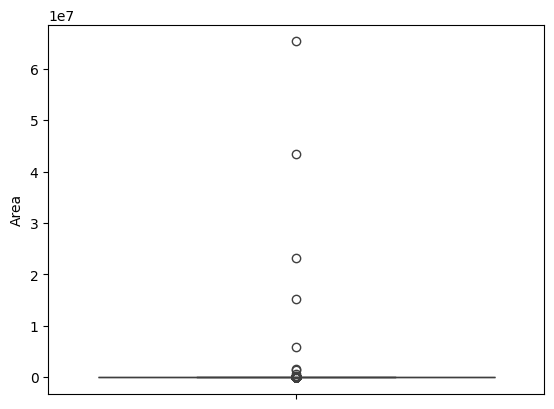

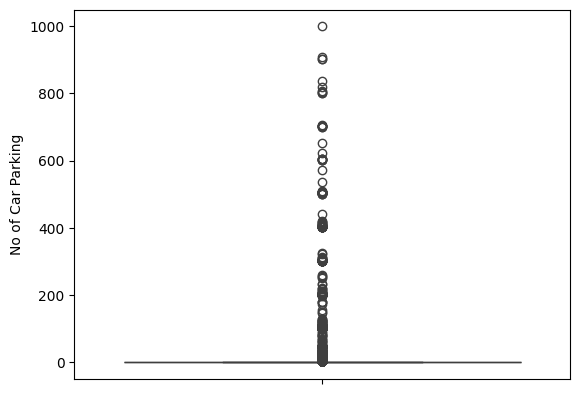

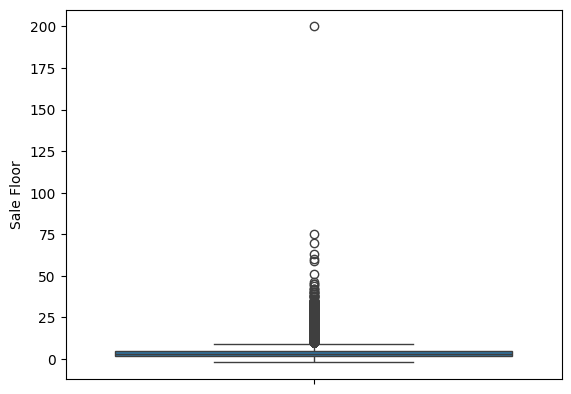

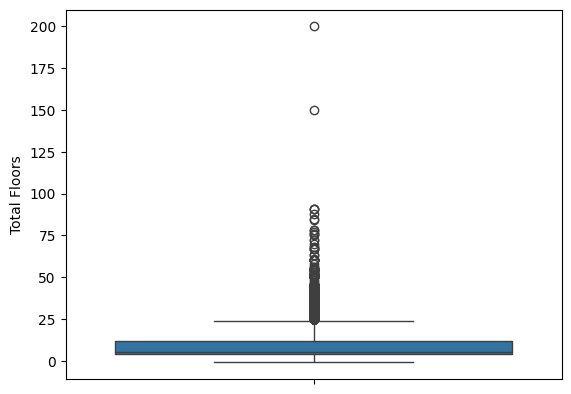

In [ ]:
for i in df.select_dtypes(["int64","float64"]):
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df[df["Amount"]>20000]

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Society,Bathroom,Balcony,Ownership,BHK,Amount,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
48200,"Kachna Road, Raipur has an attractive 2 BHK Fl...",raipur,New Property,Unfurnished,East,"Garden/Park, Pool, Main Road",Standlone Building,2,2,Freehold,2,39675.0,920.0,Covered,1,2,2
48306,"This lovely 2 BHK Flat in Saddu, Raipur is up ...",raipur,New Property,Unfurnished,East,"Garden/Park, Main Road",Chaitanya Greens,2,1,Freehold,2,22980.0,750.0,Covered,1,2,9
49733,This ready to move-in 3 BHK flat is available ...,siliguri,New Property,Unfurnished,North,Main Road,Standlone Building,2,1,Freehold,3,51004.0,970.0,Covered,1,1,4
53946,Have a look at this immaculate 3 BHK flat for ...,vadodara,New Property,Unfurnished,Not Mentioned,Not Available,Nest Harmony,3,5,Not Mentioned,3,140030.0,1252.0,Covered,1,5,9


Considering the area of the flat, it is highly unusual for 2 or 3 BHk flats to have this high "Amount". So, we will remove these values.

In [ ]:
#Dropping the rows with "Amount" more than 200 Crore
df.drop(df[df["Amount"]>20000].index, inplace=True)

<Axes: ylabel='Amount'>

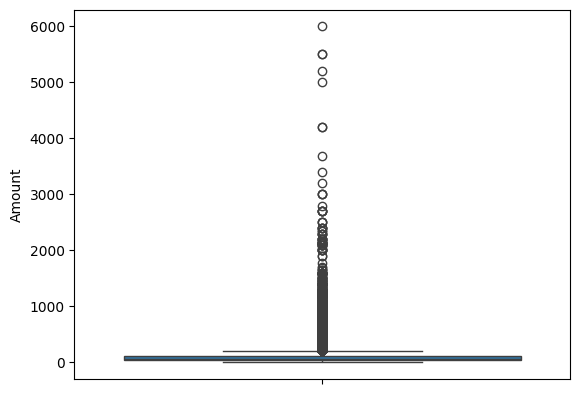

In [ ]:
sns.boxplot(df["Amount"])

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#This gives details of 5 largest area of flats
df.sort_values(by="Area").tail(5)

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Society,Bathroom,Balcony,Ownership,BHK,Amount,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
50618,This beautiful 2 BHK Flat is available for sal...,sonipat,Resale,Unfurnished,North - East,Garden/Park,Standlone Building,2,2,Freehold,2,30.0,5880600.0,Not_Available,0,2,2
55259,"This lovely 5 BHK Flat in Akota, Vadodara is u...",vadodara,Resale,Semi-Furnished,East,Garden/Park,Standlone Building,4,5,Leasehold,5,128.0,15246000.0,Not_Available,0,1,4
38685,This exquisite 2 BHK Flat is offered for sale ...,greater-noida,Resale,Semi-Furnished,North - East,"Garden/Park, Pool, Main Road",Unitech Habitat,3,1,Freehold,2,85.0,23140800.0,Covered,1,12,18
48334,Up for immediate sale is a 2 BHK apartment in ...,raipur,Resale,Unfurnished,Not Mentioned,Not Available,Standlone Building,2,1,Co-operative Society,2,27.0,43472880.0,Not_Available,0,1,5
19573,its a duplex flat car parking.very near to git...,kolkata,Resale,Semi-Furnished,South - East,Not Available,The Nest,2,1,Freehold,3,55.0,65340000.0,Covered,1,-1,2


From the above table we can see that it is not possible for a flat to have this huge area with such a less amount. So we need to impute the outliers of "Area".

In [ ]:
#Making a separate dataframe for the upper bound outliers manually for "Area" more than 15000 sqft
outliers_ub=df[df["Area"]>15000]

In [ ]:
outliers_ub.shape[0]

42

There are 42 upper bound outliers.

In [ ]:
outliers_ub.sort_values(by="Area")

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Society,Bathroom,Balcony,Ownership,BHK,Amount,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
49909,This exquisite 3 BHK Flat is offered for sale ...,siliguri,Resale,Unfurnished,South,Not Available,Standlone Building,2,1,Freehold,3,110.0,1.505200e+04,Open,1,1,4
12076,"Sector 24, Gurgaon has an appealing 6 BHK flat...",gurgaon,Resale,Furnished,North - East,"Garden/Park, Pool, Main Road",Standlone Building,7,3,Freehold,6,2400.0,1.550000e+04,Covered,2,2,13
34575,Have a look at this immaculate 3 BHK flat for ...,faridabad,New Property,Unfurnished,North,Garden/Park,Standlone Building,3,3,Freehold,3,93.0,1.600000e+04,Not_Available,0,1,4
49767,Discover this immaculate 4 BHK flat for sale a...,siliguri,New Property,Unfurnished,North,Not Available,Standlone Building,3,1,Freehold,4,97.7,1.627500e+04,Covered,1,1,4
49823,This ready to move-in 4 BHK flat is available ...,siliguri,New Property,Unfurnished,North,Not Available,Standlone Building,3,3,Freehold,4,97.7,1.627500e+04,Covered,1,1,4
34777,3 BHK flat available for sale in Faridabad in ...,faridabad,Resale,Semi-Furnished,East,Main Road,Standlone Building,3,2,Freehold,3,95.0,1.665000e+04,Covered,1,2,4
43362,This exquisite 3 BHK Flat is offered for sale ...,kochi,Resale,Unfurnished,East,"Garden/Park, Pool, Main Road",Trinity Neptune,3,1,Freehold,3,82.0,1.720000e+04,Not_Available,0,0,23
49686,This ready to move-in 3 BHK flat is available ...,siliguri,Resale,Unfurnished,Not Mentioned,Not Available,Standlone Building,2,4,Not Mentioned,3,75.0,1.800000e+04,Not_Available,0,6,6
35087,One can find this stunning 3 BHK flat for sale...,faridabad,Resale,Semi-Furnished,East,Not Available,Puri Pranayam,3,4,Freehold,3,105.0,1.856600e+04,Open,1,15,17
49668,Up for immediate sale is a 4 BHK apartment in ...,siliguri,New Property,Unfurnished,South,"Garden/Park, Pool",Standlone Building,4,1,Freehold,4,147.0,2.170500e+04,Covered,1,3,5


In [ ]:
#Making a separate dataframe for the lower bound outliers manually for "Area" less than 100 sqft
outliers_lb=df[df["Area"]<100]

In [ ]:
outliers_lb.shape[0]

102

In [ ]:
outliers=pd.concat([outliers_ub,outliers_lb])

In [ ]:
outliers.shape[0]

144

In [ ]:
outliers.shape[0]/df.shape[0]*100

0.24067388688327318

There are total 144 outliers to impute, which is 0.24%

In [ ]:
outliers.index

Index([  772,  9352, 10766, 11007, 12076, 12385, 12518, 14963, 15650, 19573,
       ...
       57124, 57209, 57467, 57603, 57819, 57835, 58218, 58235, 58242, 58316],
      dtype='int64', length=144)

In [ ]:
#Replace the outliers with np.nan to impute
df.loc[outliers.index,"Area"]=np.nan

In [ ]:
df.isna().sum()

Description              0
Location                 0
Transaction              0
Furnishing               0
Facing                   0
Overlooking              0
Society                  0
Bathroom                 0
Balcony                  0
Ownership                0
BHK                      0
Amount                   0
Area                   144
Type of Car Parking      0
No of Car Parking        0
Sale Floor               0
Total Floors             0
dtype: int64

In [ ]:
#Using K-NN imputer to impute

from sklearn.impute import KNNImputer

imputer = KNNImputer()
df["Area"] = imputer.fit_transform(df[["Area"]])

<Axes: ylabel='Area'>

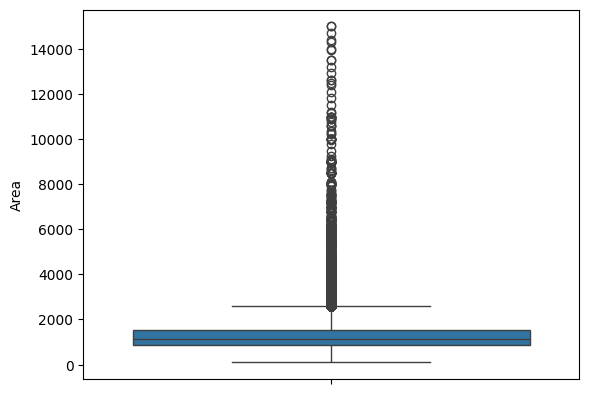

In [ ]:
sns.boxplot(df["Area"])

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.to_csv("/content/drive/MyDrive/Final_ML_Project/cleaned2_house_prices.csv",index=False)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Final_ML_Project/cleaned2_house_prices.csv")

###Exploratory Data Analysis (After Outlier Treatment)

In [ ]:
df["Amount"].value_counts()

Amount
45.0      1590
65.0      1523
55.0      1438
60.0      1325
40.0      1273
          ... 
472.0        1
3680.0       1
782.0        1
940.0        1
88.6         1
Name: count, Length: 1505, dtype: int64

The most repeated amount for buying a flat are 45 Lakh,65 Lakh, 55 Lakh,66 Lakh.

In [ ]:
df["Amount"].describe()

count    59832.000000
mean       102.782939
std        148.380251
min          1.000000
25%         41.500000
50%         65.000000
75%        110.000000
max       6000.000000
Name: Amount, dtype: float64

* The minimum amount in the dataset for buying flats is 1 Lakh.
* And the maximum is 60 Crore.
* Average amount is 1.02 Crore

In [ ]:
df["Society"].value_counts()

Society
Standlone Building       33863
Sushma Grande              105
RPS Savana                  99
Sushma Valencia             96
DLF The Valley Garden       82
                         ...  
Ambika Apartment             1
Shri Niketan                 1
DDA Rose Apartments          1
Sita Ram Apartments          1
Jaivee Radha Enclave         1
Name: count, Length: 9625, dtype: int64

Most of the apartments in the dataset do not belong to any society or any other group. Some of the society which are more in number are Sushma Grande, RPS Savana, Sushma Valencia.

In [ ]:
df["No of Car Parking"].value_counts()

No of Car Parking
0      33479
1      21178
2       3985
3        494
4        136
       ...  
151        1
53         1
89         1
87         1
259        1
Name: count, Length: 149, dtype: int64

In [ ]:
(df[df["No of Car Parking"]==0]).shape[0]/df.shape[0]*100

55.95500735392432

About 56% of the flats do not have a parking facility. And Among the one which provides parking 1 is the most common number of parking area.

In [ ]:
df["Sale Floor"].value_counts()

Sale Floor
 2      11034
 1      10377
 3       8930
 4       6378
 5       4661
 0       3374
 6       2454
 7       2323
 8       1797
 9       1532
 10      1506
 12      1042
 11       951
 14       521
 15       428
 13       405
 16       313
 18       259
 17       249
-1        193
 20       184
 19       158
 21       116
-2        115
 22        85
 25        69
 23        69
 24        67
 26        55
 30        34
 28        32
 27        28
 29        18
 32        15
 33        10
 31         9
 35         8
 34         6
 38         4
 40         4
 42         3
 37         2
 39         2
 45         2
 63         1
 75         1
 70         1
 60         1
 44         1
 46         1
 36         1
 59         1
 51         1
 200        1
Name: count, dtype: int64

The most repeated floors are 2 and 3

In [ ]:
df["Sale Floor"].describe()

count    59832.000000
mean         4.365122
std          4.463374
min         -2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        200.000000
Name: Sale Floor, dtype: float64

* The values ranges from -2 to 200.
* Mean is 4.36.
* And it is right skewed

In [ ]:
df["Total Floors"].value_counts()

Total Floors
4     12868
5      7498
3      6837
6      2984
7      2951
      ...  
85        1
88        1
47        1
58        1
70        1
Name: count, Length: 74, dtype: int64

Most of the bulding have total number of floors equal to 4, followed by 5 and 3.

In [ ]:
df["Total Floors"].describe()

count    59832.000000
mean         8.635697
std          7.006665
min         -1.000000
25%          4.000000
50%          5.000000
75%         12.000000
max        200.000000
Name: Total Floors, dtype: float64

* The values ranges from -1 to 200.
* Mean is 8.63.
* And it is right skewed.

In [ ]:
df["Area"].value_counts()

Area
1000.0    1587
1100.0    1539
900.0     1475
1200.0    1363
800.0      972
          ... 
4734.0       1
3978.0       1
3393.0       1
6313.0       1
136.0        1
Name: count, Length: 3063, dtype: int64

1000 sqft, 1100 sqft, 900 sqft, 1200 sqft are some of the most repeated area of flats in the dataset.

In [ ]:
df["Area"].describe()

count    59832.000000
mean      1307.439399
std        781.549285
min        100.000000
25%        863.000000
50%       1150.000000
75%       1550.000000
max      15000.000000
Name: Area, dtype: float64

* The area ranges from 100 sqft to 15000 sqft.
* Average Area is 1307 sqft

In [ ]:
df.pivot_table(values='Amount', index='BHK', columns='Balcony', aggfunc='mean')

Balcony,0,1,2,3,4,5,6,7,8,9,10
BHK,,,,,,,,,,,
1,34.910363,30.816709,32.889623,36.294979,48.250000,NaN,NaN,NaN,NaN,NaN,300.000000
2,57.380345,53.204084,56.996783,60.860193,62.381429,64.975000,114.750000,45.000000,NaN,NaN,NaN
3,98.213864,107.435839,107.455931,119.571475,116.231317,124.679811,124.983871,70.500000,125.000000,NaN,132.428571
4,242.270519,289.056058,267.069052,286.116784,299.278719,432.040268,405.432000,590.833333,236.833333,NaN,575.000000
5,323.043478,440.133333,370.883838,631.487805,456.768421,597.053571,1022.678571,393.000000,1647.500000,175.0,NaN
6,410.384615,628.333333,759.900000,983.500000,625.375000,737.545455,431.666667,292.500000,326.000000,NaN,NaN
7,696.750000,782.000000,280.000000,112.500000,363.333333,425.000000,NaN,NaN,NaN,NaN,NaN
8,NaN,850.000000,1875.000000,4200.000000,550.000000,NaN,NaN,NaN,650.000000,NaN,3680.000000
9,190.000000,NaN,NaN,260.000000,507.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
(df.pivot_table(values='Amount', index='BHK', columns='Balcony', aggfunc='mean')).max().max()

4200.0

Average Price is the maximum for 8 BHK with 3 Balcony i.e. 42 Crore.

In [ ]:
(df.pivot_table(values='Amount', index='BHK', columns='Balcony', aggfunc='mean')).min().min()

30.816709118695872

Average Price is the minimum for 1 BHK with 1 Balcony i.e. 30.8 Lakh.

In [ ]:
df.pivot_table(values='Amount', index='Overlooking', columns='Furnishing', aggfunc='mean',margins=True)

Furnishing,Furnished,Semi-Furnished,Unfurnished,All
Overlooking,,,,
Garden/Park,131.778960,159.040719,110.438539,136.773369
"Garden/Park, Main Road",120.767586,132.022138,101.446771,118.337157
"Garden/Park, Pool",148.448958,180.697478,139.090205,159.935890
"Garden/Park, Pool, Main Road",158.062708,141.216032,129.511782,137.516205
Main Road,100.156933,97.390587,84.879305,92.196949
"Main Road, Pool",178.341667,124.900000,151.966279,145.639512
Not Available,85.348754,78.738304,69.736054,76.210762
Pool,164.073585,138.090833,118.433553,133.134462
All,103.674062,113.171105,91.373514,102.782939


In [ ]:
(df.pivot_table(values='Amount', index='Overlooking', columns='Furnishing', aggfunc='mean',margins=True)).max().max()

180.69747793190416

We can see that Garden/Park, Pool with Semi-Furnished flats have the highest average price i.e. 1.8 Crore

In [ ]:
(df.pivot_table(values='Amount', index='Overlooking', columns='Furnishing', aggfunc='mean',margins=True)).min().min()

69.73605392413

We can see that UnFurnished flats without any overlooking have the lowest average price i.e. 69.7 Lakh.

<Axes: >

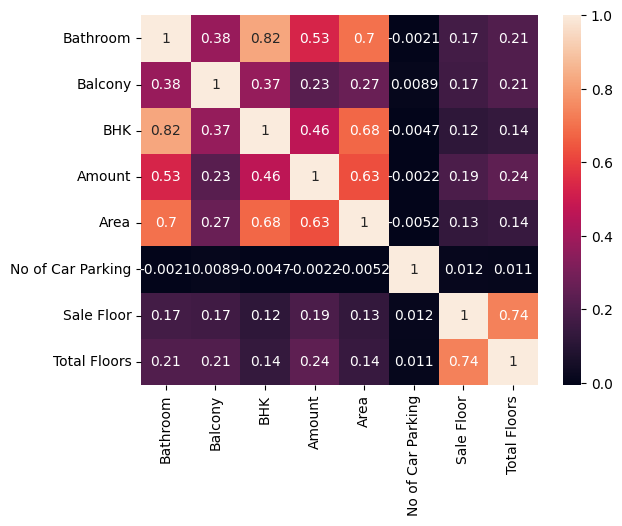

In [ ]:
sns.heatmap(df.select_dtypes(["int64","float64"]).corr(),annot=True)

From the above heatplot we can observe that,
1. Bathroom and BHK has the highest correlation of 0.82, which means that the flats with more number of rooms has more number of bathroom.
2. Area has a good correlation with bathroom, BHK and amount, which means that if the area of the flat is more, the number of bathroom, BHK and amount is also high.
3. Total Floor and Sale Floor also has a good correlation of 0.74.
4. Even bathroom and BHK has some correlation with Amount.

###Word Cloud for Description Column

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [ ]:
def preprocess(sentence):

  tokens=re.sub("[^a-zA-Z]"," ",sentence).lower().split()
  clean_tokens=[t for t in tokens if t not in stopwords.words("english")]
  clean_tokens_lemma=[lemmatizer.lemmatize(t) for t in clean_tokens]
  cleaned_text=' '.join(clean_tokens_lemma)
  return cleaned_text

In [ ]:
df["Description"]=df["Description"].apply(lambda x: preprocess(x))

In [ ]:
for i in range(1,20,3):
   print(df["Description"][i])

one find stunning bhk flat sale pokhran road thane enjoys excellent location within dosti vihar flat resale choice property ready move flat pokhran road availed reasonable price inr lac semi furnished flat strategically designed amenity enhance living experience property strategically placed near prominent place near singhaniya school make smooth living resident
lovely bhk flat pokhran road thane sale flat situated tenx habitat raymond realty township equipped premium facility flat attractive property resale buy ready move flat pokhran road reasonable price inr cr find unfurnished landmark vicinity include pokhran road
creatively planned constructed bhk flat sale kalwa thane flat attractive property resale ready move flat located kalwa available purchase fair price inr lac furnished flat strategically designed amenity enhance living experience
immediate sale bhk apartment manpada thane west thane miss bargain flat sale prime location within cosmos lounge invest valuable money flat resa

In [ ]:
words=' '.join([i for i in df["Description"]])

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(width=2000, height=1000,
                      background_color='black').generate(words)

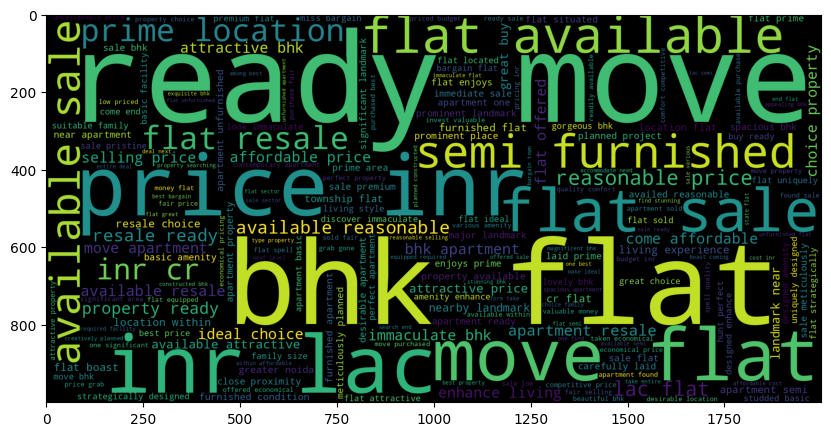

In [ ]:
from PIL import Image
plt.figure(figsize=(10,20))
plt.imshow(wordcloud)

From the above wordcloud, we can see that the words like "attractive"," immaculate" "reasonable,"affordable", "ideal choice", "close proximity", etc have been used.